In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd

In [2]:
#Imports the all encompassing csv file
df3 = dd.read_csv("Tax Records\\Property Currently with Tax Liens.csv")

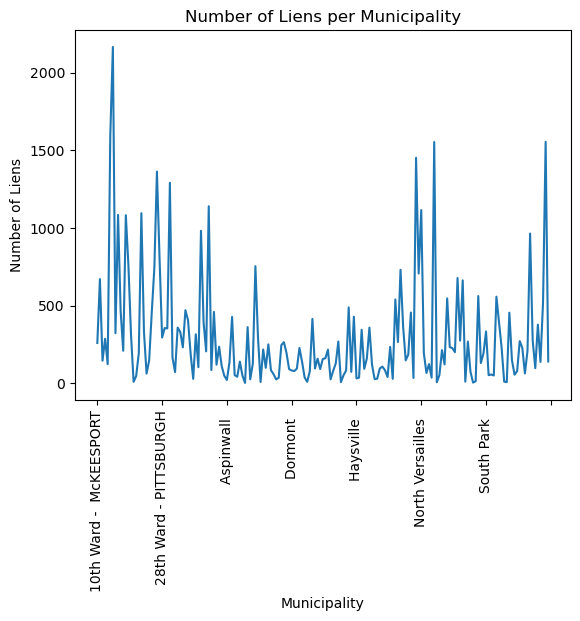

In [6]:
#Shows how many liens exist per municipality 
municipality_counts = df3['Municipality Name'].value_counts().compute()
municipality_counts.plot()
plt.title("Number of Liens per Municipality")
plt.xlabel("Municipality")
plt.ylabel("Number of Liens")
plt.xticks(rotation=90)
plt.show()

Municipality Name
10th Ward -  McKEESPORT     4497
10th Ward - PITTSBURGH      9667
11th Ward  - McKEESPORT     2825
11th Ward - PITTSBURGH      2419
12th Ward  - McKEESPORT     2686
                           ...  
White Oak                  17921
Whitehall                   2088
Wilkins                    23051
Wilkinsburg                32991
Wilmerding                  2126
Name: number, Length: 175, dtype: int64


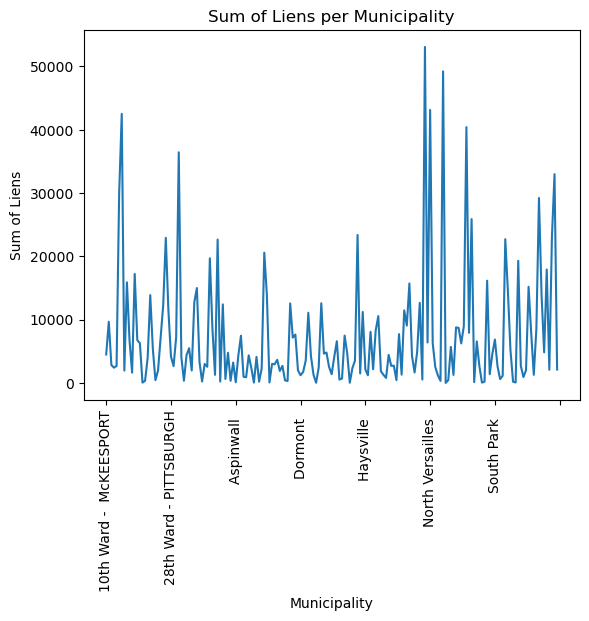

In [8]:
#Sums up amount of liens based on the municipality 
municipality_liens_sum = df3.groupby('Municipality Name')['number'].sum()
municipality_liens_sum_result = municipality_liens_sum.compute()
print(municipality_liens_sum_result)
municipality_liens_sum_result.plot()
plt.title("Sum of Liens per Municipality")
plt.xlabel("Municipality")
plt.ylabel("Sum of Liens")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Filters by owners that owe back taxes 
owners_owing_back_taxes = df3[df3['Back Taxes Owed'] > 0]
owners_owing_back_taxes_result = owners_owing_back_taxes.compute()  
print(owners_owing_back_taxes_result)

          _id Parcel Identification Number  Street Address Number  \
0      486715             0381E00220000000                      0   
1      259505             0136R00086000000                   3665   
2      505092             0464L00368000000                      0   
3       37085             0174E00041000000                      0   
4       18867             0049C00006000000                   4410   
...       ...                          ...                    ...   
52744   37367             0174E00019000000                      0   
52745  426086             0162K00115000000                      0   
52746  121018             0070E00040000000                    502   
52747  455281             0073D00181000000                      0   
52748  142614             0236S00120000000                      0   

       Street Address Line 2     Street Name           City State  \
0                        NaN        SOLES ST    MC KEESPORT    PA   
1                        NaN     

In [10]:
#Filters further by adding parameters such as SINGLE FAMILY as the land code description and a specific Zip Code
back_taxes_filter = df3['Back Taxes Owed'] > 0
land_use_filter = df3['Land Use Code Description'] == "SINGLE FAMILY"
zip_code_filter = df3['Zip Code'] == 15132  

combined_filter = back_taxes_filter & land_use_filter & zip_code_filter

filtered_combined = df3[combined_filter]

filtered_combined_result = filtered_combined.compute()

print(filtered_combined_result)

          _id Parcel Identification Number  Street Address Number  \
12     128811             0380S00274000000                   1017   
34     135540             0381H00003000000                   1400   
107    134716             0381B00315000000                   1306   
136    135418             0382M00329000000                   1816   
403    134411             0307P00070000000                    611   
...       ...                          ...                    ...   
52509  135092             0381F00376000000                   1402   
52510  129276             0381K00266000000                   2900   
52666  220922             0554N00047000000                    605   
52694  543746             0382M00017000000                   2108   
52737  542900             0463F00341000000                    689   

       Street Address Line 2      Street Name         City State  \
12                       NaN  N PATTERSON AVE  MC KEESPORT    PA   
34                       NaN    GRA

In [ ]:
#Prompts the user to search the database with a zip code they input instead 
def search_by_zip_code(df, zip_code):
    zip_code = str(zip_code).strip()
    
    zip_code_filter = df['Zip Code'].astype(str).str.strip() == zip_code
    filtered_df = df[zip_code_filter]
    return filtered_df
user_zip_code = input("Please enter a Zip Code to search for: ")
filtered_results = search_by_zip_code(df3, user_zip_code)
filtered_results_result = filtered_results.compute()
if filtered_results_result.empty:
    print("No records found for the given Zip Code.")
else:
    print(filtered_results_result)

          _id Parcel Identification Number  Street Address Number  \
5      567720             0185K00057000000                    804   
39     230029             0181G00162000000                   3300   
65     230052             0181B00261000000                      0   
84     234796             0469G00275000000                      0   
112    225097             0237N00060000000                    709   
...       ...                          ...                    ...   
52527  223388             0238J00117000000                      0   
52594  224701             0237P00292000000                      0   
52630  224261             0244B00270000000                      0   
52660  228920             0181B00199000000                      0   
52736  528809             0306G00108000000                    403   

       Street Address Line 2    Street Name          City State  \
5                        NaN       JOYCE DR  WEST MIFFLIN    PA   
39                       NaN   DUQUES